In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [2]:
data = pd.read_csv('../heart_dataset.csv')
data.shape

(1510, 14)

In [3]:
data.target.value_counts()

target
1    797
0    713
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1510 non-null   int64  
 1   sex       1510 non-null   int64  
 2   cp        1510 non-null   int64  
 3   trestbps  1510 non-null   int64  
 4   chol      1510 non-null   int64  
 5   fbs       1510 non-null   int64  
 6   restecg   1510 non-null   int64  
 7   thalach   1510 non-null   int64  
 8   exang     1510 non-null   int64  
 9   oldpeak   1510 non-null   float64
 10  slope     1510 non-null   int64  
 11  ca        1510 non-null   int64  
 12  thal      1510 non-null   int64  
 13  target    1510 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 165.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X = data.iloc[:,:13].values
y = data["target"].values

In [7]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Printing number of samples in each class after Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('After Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

After Under-Sampling: 
Samples in class 0:  797
Samples in class 1:  797


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.linear_model import LogisticRegression

# logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [14]:
from sklearn.svm import SVC

# Support Vector Machines (SVM) classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [17]:
import xgboost as xgb

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=6, learning_rate=0.1, n_estimators=100, n_jobs=-1)
xgb_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

In [18]:
print(f"Logistic Regression Accuracy: {round(logreg_accuracy * 100, 2)}%")
print(f"Decision Tree Classifier Accuracy: {round(dt_accuracy * 100, 2)}%")
print(f"Random Forest Classifier Accuracy: {round(rf_accuracy * 100, 2)}%")
print(f"Support Vector Machines (SVM) Accuracy: {round(svm_accuracy * 100, 2)}%")
print(f"Gradient Boosting Classifier Accuracy: {round(gb_accuracy * 100, 2)}%")
print(f"K-Neighbors Classifier Accuracy: {round(knn_accuracy * 100, 2)}%")
print(f"XGBoost Classifier Accuracy: {round(xgb_accuracy * 100, 2)}%")

Logistic Regression Accuracy: 74.95%
Decision Tree Classifier Accuracy: 82.67%
Random Forest Classifier Accuracy: 88.1%
Support Vector Machines (SVM) Accuracy: 81.21%
Gradient Boosting Classifier Accuracy: 84.13%
K-Neighbors Classifier Accuracy: 79.75%
XGBoost Classifier Accuracy: 87.06%


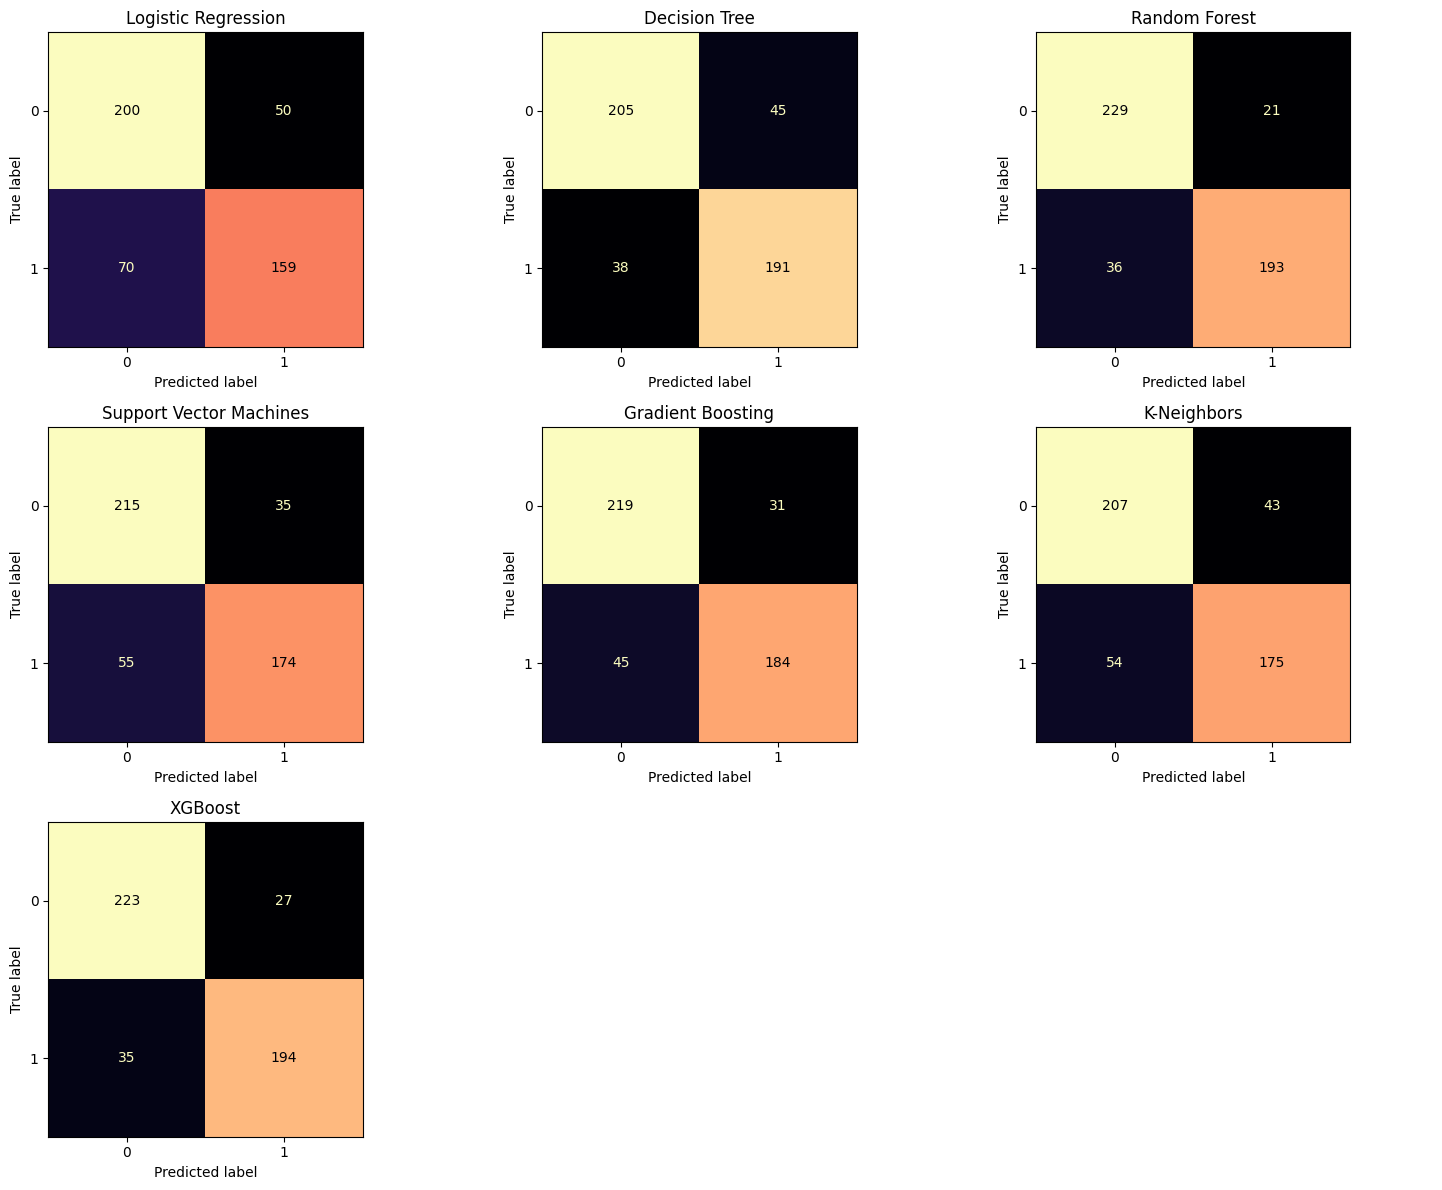

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(ax, model_name, y_test, y_pred):
    model_pred = (y_pred > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, model_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='magma', colorbar=False)
    ax.set_title(model_name)

model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'Support Vector Machines', 'Gradient Boosting', 'K-Neighbors', 'XGBoost'
]

y_pred_list = [
    y_pred_logreg, y_pred_dt, y_pred_rf,
    y_pred_svm, y_pred_gb, y_pred_knn, y_pred_xgb
]

fig, axes = plt.subplots(3, 3, figsize=(5 * 3, 4 * 3))
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(zip(model_names, y_pred_list)):
    plot_confusion_matrix(axes[i], model_name, y_test, y_pred)

for j in range(len(model_names), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import classification_report

print("Classification Reports:")
print(f"Logistic Regression:\n{classification_report(y_test, y_pred_logreg)}")
print(f"Decision Tree:\n{classification_report(y_test, y_pred_dt)}")
print(f"Random Forest:\n{classification_report(y_test, y_pred_rf)}")
print(f"SVM:\n{classification_report(y_test, y_pred_svm)}")
print(f"Gradient Boosting:\n{classification_report(y_test, y_pred_gb)}")
print(f"KNN:\n{classification_report(y_test, y_pred_knn)}")
print(f"XGBoost:\n{classification_report(y_test, y_pred_xgb)}")

Classification Reports:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       250
           1       0.76      0.69      0.73       229

    accuracy                           0.75       479
   macro avg       0.75      0.75      0.75       479
weighted avg       0.75      0.75      0.75       479

Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       250
           1       0.81      0.83      0.82       229

    accuracy                           0.83       479
   macro avg       0.83      0.83      0.83       479
weighted avg       0.83      0.83      0.83       479

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       250
           1       0.90      0.84      0.87       229

    accuracy                           0.88       479
   macro avg       0.88      0.88      0.88       479